<a href="https://colab.research.google.com/github/wuwewij/wuwewij/blob/main/OrganicChem-FullCnovNet-LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x1: (None, 16, 16, 16) (None, 16) (None, 16, 16, 16) (None, 16)
x1_weight: (None, 16) KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='dense_78/Sigmoid:0', description="created by layer 'dense_78'") (None, 16)
x1_weight: (None, 1, 1, 16) KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 16), dtype=tf.float32, name=None), name='reshape_63/Reshape:0', description="created by layer 'reshape_63'") (None, 1, 1, 16)
x1_weighted: (None, 16, 16, 16) KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 16), dtype=tf.float32, name=None), name='tf.math.multiply_63/Mul:0', description="created by layer 'tf.math.multiply_63'") (None, 16, 16, 16)
(None, 16, 16, 16)
Epoch 1/100
23/23 [==============================] - 7s 70ms/step - loss: 1129.8524 - mse: 1129.8524 - val_loss: 816.5544 - val_mse: 816.5544
Epoch 2/100
23/23 [==============================] - 1s 57ms/step - loss: 610.5110 - mse: 610.5110 - val_loss: 518.1218 - val_mse: 518.1218
Epoch 3/100
23/23

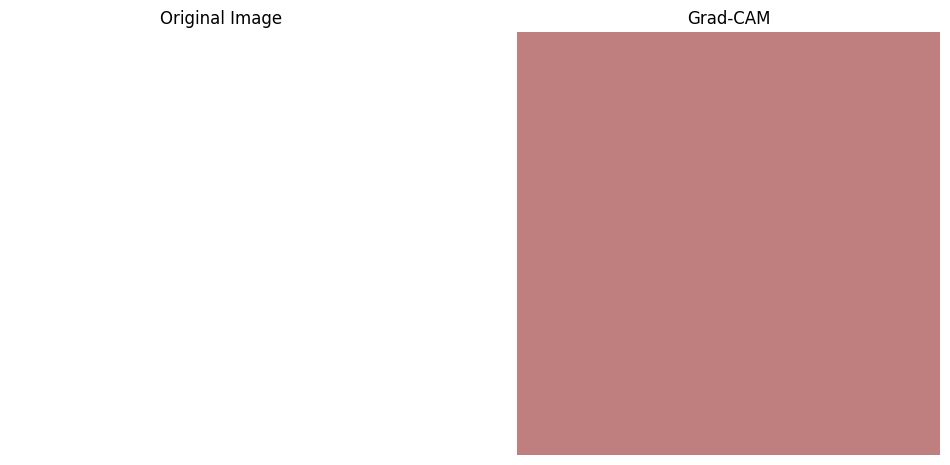

3/3 [==============================] - 0s 12ms/step
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9230
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 59
[LightGBM] [Info] Start training from score 38.939428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:

import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.layers import (Input, Reshape)
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.layers import SeparableConv2D
from keras import backend as K
from keras.layers import (Input, Reshape)
from keras.layers import Concatenate
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.models import Model
import lightgbm as lgb
from PIL import Image
X= np.loadtxt(open("/x(1).csv","rb"),delimiter=",",skiprows=1)
y=np.loadtxt(open("/y(1).csv","rb"),delimiter=",",skiprows=1)
from PIL import Image
import numpy as np
import tensorflow as tf

# 加载图像并预处理
img = Image.open('/background.png')
img_resized = img.resize((16, 16))
img_gray = img_resized.convert('L')  # 如果模型接受灰度图像
img_array = np.array(img_gray)
img_array = img_array / 255.0  # 归一化
img_array = np.expand_dims(img_array, axis=0)
img_array = np.expand_dims(img_array, axis=-1)  # 如果模型接受单通道图像


def compute_gradcam(model, img_array, layer_name):
    # 构建一个模型，其输出是指定层的输出和最后的模型输出
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output])

    # 记录指定层的梯度
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions

    # 获取指定层的输出
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    # 计算梯度的加权平均
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 将特征图数组和梯度数组相乘，然后取平均
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, output), axis=-1)

    # ReLU激活并归一化热力图
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


i=1
time12=[]
mae12=[]
rmse12=[]
r212=[]
time22=[]
mae22=[]
rmse22=[]
r222=[]
while i<=1:

    import time
    start1 = time.time()
    data_y, data_yhat = list(), list()
    kfold = KFold(n_splits=10, shuffle=True)
# enumerate splits
    for train_ix, test_ix in kfold.split(X):
# get data
        train_x, test_x = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
    ss_x = preprocessing.StandardScaler()
    train_x_disorder = ss_x.fit_transform(train_x)
    test_x_disorder = ss_x.transform(test_x)
    X_train=train_x_disorder.reshape([-1,16,16, 1])
    X_test=test_x_disorder.reshape([-1, 16,16, 1])
    y_train=train_y.reshape(-1, 1)
    y_test=test_y.reshape(-1, 1)

    inputs=Input(shape=(16,16,1))

    x1=keras.layers.Conv2D(16,(1,1),activation='relu',padding='SAME')(inputs)
    x2=keras.layers.Conv2D(32,(1,1),activation='relu',padding='SAME')(x1)
    x3=keras.layers.Conv2D(64,(1,1),activation='relu',padding='SAME')(x2)
    x4=keras.layers.Conv2D(128,(1,1),activation='relu',padding='SAME')(x3)
    x2=keras.layers.Conv2D(16,(1,1),activation='relu',padding='SAME')(x2)
    x3=keras.layers.Conv2D(16,(1,1),activation='relu',padding='SAME')(x3)
    x4=keras.layers.Conv2D(16,(1,1),activation='relu',padding='SAME')(x4)

    x4_3 = abs(x4-x3)
    x3_2 = abs(x3-x2)
    x2_1 = abs(x2-x1)

    x4_3_2 = abs(x4_3 - x3_2)
    x3_2_1 = abs(x3_2 - x2_1)

    x4_3_2_1 = abs(x4_3_2 - x3_2_1)

    level4=x4
    level3 = x4_3
    level2 = x3_2 + x4_3_2
    level1 =x2_1 + x3_2_1 + x4_3_2_1

    #x4_dem_4 = x4
    #output3 = x4_dem_4 + level3
    #output2 = output3 + level2
    #output1 = output2 + level1
    x1_mean=keras.layers.GlobalAveragePooling2D()(level1)
    x2_mean=keras.layers.GlobalAveragePooling2D()(level2)
    x3_mean=keras.layers.GlobalAveragePooling2D()(level3)
    x4_mean=keras.layers.GlobalAveragePooling2D()(level4)

    print('x1:',x1.shape,x1_mean.shape,x4.shape,x4_mean.shape)

    x1_weight=keras.layers.Dense(units=x1.shape[-1], activation='sigmoid')(x1_mean)
    x2_weight=keras.layers.Dense(units=x2.shape[-1], activation='sigmoid')(x2_mean)
    x3_weight=keras.layers.Dense(units=x3.shape[-1], activation='sigmoid')(x3_mean)
    x4_weight=keras.layers.Dense(units=x4.shape[-1], activation='sigmoid')(x4_mean)
    print('x1_weight:',x1_weight.shape,x4_weight,x4_weight.shape)

    x1_weight=keras.layers.Reshape((1,1,x1.shape[-1]))(x1_weight)
    x2_weight=keras.layers.Reshape((1,1,x2.shape[-1]))(x2_weight)
    x3_weight=keras.layers.Reshape((1,1,x3.shape[-1]))(x3_weight)
    x4_weight=keras.layers.Reshape((1,1,x4.shape[-1]))(x4_weight)
    print('x1_weight:',x1_weight.shape,x4_weight,x4_weight.shape)

    x1_weighted=level1*x1_weight
    x2_weighted=level2*x2_weight
    x3_weighted=level3*x3_weight
    x4_weighted=level4*x4_weight
    print('x1_weighted:',x1_weighted.shape,x4_weighted,x4_weighted.shape)

    #x=keras.layers.Concatenate(axis=-1)([x1_weighted, x2_weighted, x3_weighted, x4_weighted])
    x=x1_weighted+x2_weighted+x3_weighted+x4_weighted
    print(x.shape)
    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(256,activation='relu',name='mydense1')(x)
    x=keras.layers.Dense(120,activation='relu',name='mydense2')(x)
    x=keras.layers.Dense(100,activation='relu',name='mydense3')(x)
    #=keras.layers.Dense(40,activation='relu',name='mydense5')(x)
    end1 = time.time()
    x=keras.layers.Dense(1,activation='linear')(x)
    model=keras.Model(inputs,x)
    model.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])
    model_log = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),shuffle=True)
    y_pred1 = model.predict(X_test)  #根据输入数据进行预测的实际值
    end2 = time.time()
    from sklearn import metrics
    time1="%.2f"%(end2-start1)
    mae1=metrics.mean_absolute_error(test_y, y_pred1)
    rmse1=np.sqrt(metrics.mean_squared_error(test_y, y_pred1))
    r21=metrics.r2_score(test_y, y_pred1)
    time12.append(float(time1))
    mae12.append(float(mae1))
    rmse12.append(float(rmse1))
    r212.append(float(r21))
    heatmap = compute_gradcam(model, img_array, 'tf.__operators__.add_93')


    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image

# 假设 'heatmap' 是通过 Grad-CAM 计算得到的热力图
# 假设 'img' 是 PIL 图像格式的原始图像

# 将 PIL 图像转换为 NumPy 数组以用于绘图
    img_np = np.array(img)

# 调整热力图大小以匹配原始图像
    heatmap_resized = np.array(Image.fromarray(np.uint8(plt.cm.jet(heatmap)*255)).resize(img_np.shape[1::-1], Image.LANCZOS))

# 将热力图应用于原始图像
    heatmap_on_img = np.uint8(heatmap_resized[..., :3] * 0.5 + img_np * 0.5)

# 显示原始图像和叠加后的热力图
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_np)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Grad-CAM')
    plt.imshow(heatmap_on_img)
    plt.axis('off')

    plt.show()


    start2 = time.time()
    model_mydense_output3 = Model(inputs=model.input,outputs=model.get_layer('mydense3').output)
    X_tr3=model_mydense_output3.predict(X_train)
    X_te3=model_mydense_output3.predict(X_test)
    model1 =lgb.LGBMRegressor()
    evals_result = {}
    # define the datasets to evaluate each iteration
    evalset = [(X_tr3, y_train), (X_te3,y_test)]
    model1 = lgb.LGBMRegressor()
    # fit the model
    model1 = model1.fit(X_tr3, y_train)
    y_pred2 = model1.predict(X_te3)
    end3 = time.time()
    time21="%.2f"%(end3-start2+end1-start1)
    mae21=metrics.mean_absolute_error(test_y, y_pred2)
    rmse21=np.sqrt(metrics.mean_squared_error(test_y, y_pred2))
    r221=metrics.r2_score(test_y, y_pred2)
    time22.append(float(time21))
    mae22.append(float(mae21))
    rmse22.append(float(rmse21))
    r222.append(float(r221))

    i=i+1
    print(i)
    print('Mean Absolute Error:',i,np.mean(time12),np.mean(mae12),np.mean(rmse12),np.mean(r212))
print('Mean Absolute Error:',i,np.mean(time22),np.mean(mae22),np.mean(rmse22),np.mean(r222))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 新段落

In [ ]:

import torch
import wandb
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.utils
import numpy as np
import random
from PIL import Image

X = np.loadtxt("/x(1).csv", delimiter=",", skiprows=1)
y = np.loadtxt("/y(1).csv", delimiter=",", skiprows=1)

kfold = KFold(n_splits=10, shuffle=True)

# 数据标准化
ss_x = StandardScaler()
X_scaled = ss_x.fit_transform(X)
X_scaled = X_scaled.reshape(-1, 16, 16, 1)

# 将numpy数组转换为torch张量
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

i=1
time12=[]
mae12=[]
rmse12=[]
r212=[]
time22=[]
mae22=[]
rmse22=[]
r222=[]
while i<=1:

    import time
    start1 = time.time()
    data_y, data_yhat = list(), list()
# 加载数据

# K折交叉验证



class MSMWGBMNet(nn.Module)

